In [478]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import randn
import numpy as np

In [550]:
trip_df = pd.read_csv("rt_trips_2017_I_DB.csv")

In [551]:
'''
trip_df[(trip_df['lineid'] == '39A') \
        & (trip_df['dayofservice'] == '07-FEB-17 00:00:00') \
       & (trip_df['direction'] == 1)]
'''

"\ntrip_df[(trip_df['lineid'] == '39A')         & (trip_df['dayofservice'] == '07-FEB-17 00:00:00')        & (trip_df['direction'] == 1)]\n"

In [552]:
sample_df = pd.read_csv("LeaveTimes_JUN_39A.csv")
#sample_df = sample_df.drop(['Passengers', 'Passengersin','Distance', 'Suppresed','JustificationId','LastUpdate','Note'], axis=1)
sample_df.DayOfService.unique()

array(['2017-06-06', '2017-06-07', '2017-06-28', '2017-06-29',
       '2017-06-08', '2017-06-30', '2017-06-09', '2017-06-17',
       '2017-06-18', '2017-06-19', '2017-06-05', '2017-06-10',
       '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-27',
       '2017-06-15', '2017-06-01', '2017-06-02'], dtype=object)

In [553]:
sample_df = sample_df[(sample_df['DayOfService'] == '2017-06-05')].drop_duplicates().sort_index(by='ProgrNumber')
#print(sample_df)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [554]:
#oneStopPoint_df = sample_df[(sample_df['StopPointId'] == 1665)&(sample_df['ProgrNumber']==41)].drop_duplicates()
#oneStopPoint_df = sample_df[(sample_df['TripId'] = 4335097)]
oneTripId_df = sample_df
oneTripId_df.count()

Unnamed: 0         2898
Unnamed: 0.1       2898
TripId             2898
DayOfService       2898
ProgrNumber        2898
StopPointId        2898
PlannedTime_Arr    2898
PlannedTime_Dep    2898
ActualTime_Arr     2898
ActualTime_Dep     2898
VehicleId          2898
LineId             2898
RouteId            2898
Direction          2898
dtype: int64

In [555]:
#oneStopPoint_df[(oneStopPoint_df['DayOfService'] == '2017-02-06')]

In [556]:
n_trip_df = oneTripId_df.copy()
def my_test(a, b):
    return a - b
n_trip_df['DelayTime'] = n_trip_df.apply(lambda row: my_test(row['ActualTime_Arr'], row['PlannedTime_Arr']), axis=1)

In [557]:
def my_test2(a):
    return str(a//3600).zfill(2) + ":" + str(a%3600//60).zfill(2)+ ":" + str(a%3600%60).zfill(2)
n_trip_df['dayInterval'] = n_trip_df.apply(lambda row: my_test2(row['ActualTime_Dep']), axis=1)

In [558]:
def my_test3(a, b):
    return a + ' ' + "{}".format(b)
n_trip_df['DateTimeOfService'] = n_trip_df.apply(lambda row: my_test3(row['DayOfService'], row['dayInterval']), axis=1)

In [559]:
n_trip_df['standardDelayTime'] = 0

In [560]:
n_trip_df = n_trip_df.sort_index(by='DateTimeOfService').reset_index(drop=True)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [561]:
n_trip_df

,Unnamed: 0,Unnamed: 0.1,TripId,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId,LineId,RouteId,Direction,DelayTime,dayInterval,DateTimeOfService,standardDelayTime
0,2093327,2093327,5006989,2017-06-05,1,7158,29700,29700,29682,29682,1000603,39A,39A_43,2,-18,08:14:42,2017-06-05 08:14:42,0
1,2093328,2093328,5006989,2017-06-05,2,7048,29737,29737,29717,29746,1000603,39A,39A_43,2,-20,08:15:46,2017-06-05 08:15:46,0
2,2093332,2093332,5006989,2017-06-05,3,7159,29799,29799,29816,29816,1000603,39A,39A_43,2,17,08:16:56,2017-06-05 08:16:56,0
3,2093336,2093336,5006989,2017-06-05,4,7388,29816,29816,29830,29846,1000603,39A,39A_43,2,14,08:17:26,2017-06-05 08:17:26,0
4,2093339,2093339,5006989,2017-06-05,5,7017,29905,29905,29918,29936,1000603,39A,39A_43,2,13,08:18:56,2017-06-05 08:18:56,0
5,2093340,2093340,5006989,2017-06-05,6,7018,29949,29949,29986,30000,1000603,39A,39A_43,2,37,08:20:00,2017-06-05 08:20:00,0
6,2093341,2093341,5006989,2017-06-05,7,7030,29994,29994,30051,30058,1000603,39A,39A_43,2,57,08:20:58,2017-06-05 08:20:58,0
7,2093345,2093345,5006989,2017-06-05,8,7021,30020,30020,30081,30081,1000603,39A,39A_43,2,61,08:21:21,2017-06-05 08:21:21,0
8,2093346,2093346,5006989,2017-06-05,9,6111,30069,30069,30118,30154,1000603,39A,39A_43,2,49,08:22:34,2017-06-05 08:22:34,0
9,2093349,2093349,5006989,2017-06-05,10,6112,30133,30133,30199,30234,1000603,39A,39A_43,2,66,08:23:54,2017-06-05 08:23:54,0


In [562]:
# Filter on TripId
#new_trip_df = n_trip_df[(n_trip_df['TripId']==4334863)]
# Filter on StopPointId
new_trip_df = n_trip_df[(n_trip_df['StopPointId'] == 1871)]
#new_trip_df = n_trip_df[(n_trip_df['StopPointId'] == 1478)]

In [563]:
new_trip_df

,Unnamed: 0,Unnamed: 0.1,TripId,DayOfService,ProgrNumber,StopPointId,PlannedTime_Arr,PlannedTime_Dep,ActualTime_Arr,ActualTime_Dep,VehicleId,LineId,RouteId,Direction,DelayTime,dayInterval,DateTimeOfService,standardDelayTime
137,2023529,2023529,5009999,2017-06-05,51,1871,35334,35334,35095,35095,2534820,39A,39A_40,1,-239,09:44:55,2017-06-05 09:44:55,0
274,2023551,2023551,5006990,2017-06-05,51,1871,37134,37134,37952,37961,1000603,39A,39A_40,1,818,10:32:41,2017-06-05 10:32:41,0
398,2023239,2023239,5005106,2017-06-05,51,1871,41034,41034,40906,40918,2406914,39A,39A_40,1,-128,11:21:58,2017-06-05 11:21:58,0
479,2023261,2023261,5018454,2017-06-05,51,1871,42834,42834,43050,43050,2534863,39A,39A_40,1,216,11:57:30,2017-06-05 11:57:30,0
567,2023217,2023217,5006578,2017-06-05,51,1871,44634,44634,44454,44454,2534821,39A,39A_40,1,-180,12:20:54,2017-06-05 12:20:54,0
675,2023059,2023059,5010001,2017-06-05,51,1871,46618,46618,46408,46420,2534820,39A,39A_40,1,-210,12:53:40,2017-06-05 12:53:40,0
780,2022942,2022942,5006992,2017-06-05,51,1871,47818,47818,48417,48429,1000603,39A,39A_40,1,599,13:27:09,2017-06-05 13:27:09,0
883,2022963,2022963,5012064,2017-06-05,51,1871,50218,50218,50203,50223,2406883,39A,39A_40,1,-15,13:57:03,2017-06-05 13:57:03,0
889,2023031,2023031,5013984,2017-06-05,51,1871,49018,49018,50274,50288,2406915,39A,39A_40,1,1256,13:58:08,2017-06-05 13:58:08,0
975,2023130,2023130,5010286,2017-06-05,51,1871,51418,51418,51587,51602,2406870,39A,39A_40,1,169,14:20:02,2017-06-05 14:20:02,0


In [564]:
#one_day_df = new_trip_df[(new_trip_df['DayOfService'] == '2017-02-06')].reset_index(drop=True).copy()
one_day_df = new_trip_df.reset_index(drop=True).copy()
# In each vehicleId, there are more than 10 tripids. Such as VehicleId 1000950, there are 11 tripIds.
# one_day_df.TripId.unique()
# array([4334829, 4335033, 4334828, 4335032, 4334827, 4334923, 4335128,
#      4334922, 4335127, 4334921, 4335126])

In [565]:

#new_trip_df.head()
#one_day_df
#ond_day_df.set_index('dayInterval', inplace=True)
one_day_df.count()

Unnamed: 0           32
Unnamed: 0.1         32
TripId               32
DayOfService         32
ProgrNumber          32
StopPointId          32
PlannedTime_Arr      32
PlannedTime_Dep      32
ActualTime_Arr       32
ActualTime_Dep       32
VehicleId            32
LineId               32
RouteId              32
Direction            32
DelayTime            32
dayInterval          32
DateTimeOfService    32
standardDelayTime    32
dtype: int64

In [566]:
plot_df = one_day_df[['DelayTime', 'standardDelayTime','dayInterval']]
plot_df.head()

,DelayTime,standardDelayTime,dayInterval
0,-239,0,09:44:55
1,818,0,10:32:41
2,-128,0,11:21:58
3,216,0,11:57:30
4,-180,0,12:20:54


In [567]:
#plot_df['dayInterval']
#plt.xticks(plot_df['dayInterval'])

[Text(0,0,'09:44:55'),
 Text(0,0,'10:32:41'),
 Text(0,0,'11:21:58'),
 Text(0,0,'11:57:30'),
 Text(0,0,'12:20:54'),
 Text(0,0,'12:53:40'),
 Text(0,0,'13:27:09'),
 Text(0,0,'13:57:03'),
 Text(0,0,'13:58:08'),
 Text(0,0,'14:20:02'),
 Text(0,0,'14:53:23'),
 Text(0,0,'14:53:28'),
 Text(0,0,'15:20:10'),
 Text(0,0,'15:45:18'),
 Text(0,0,'15:49:50'),
 Text(0,0,'16:48:47'),
 Text(0,0,'16:49:41'),
 Text(0,0,'18:00:05'),
 Text(0,0,'18:29:38'),
 Text(0,0,'18:59:55'),
 Text(0,0,'19:03:50'),
 Text(0,0,'19:24:08'),
 Text(0,0,'19:46:00'),
 Text(0,0,'19:55:56'),
 Text(0,0,'20:14:30'),
 Text(0,0,'20:41:57'),
 Text(0,0,'21:18:38'),
 Text(0,0,'21:40:52'),
 Text(0,0,'22:04:30'),
 Text(0,0,'22:37:25'),
 Text(0,0,'23:10:05'),
 Text(0,0,'23:37:00')]

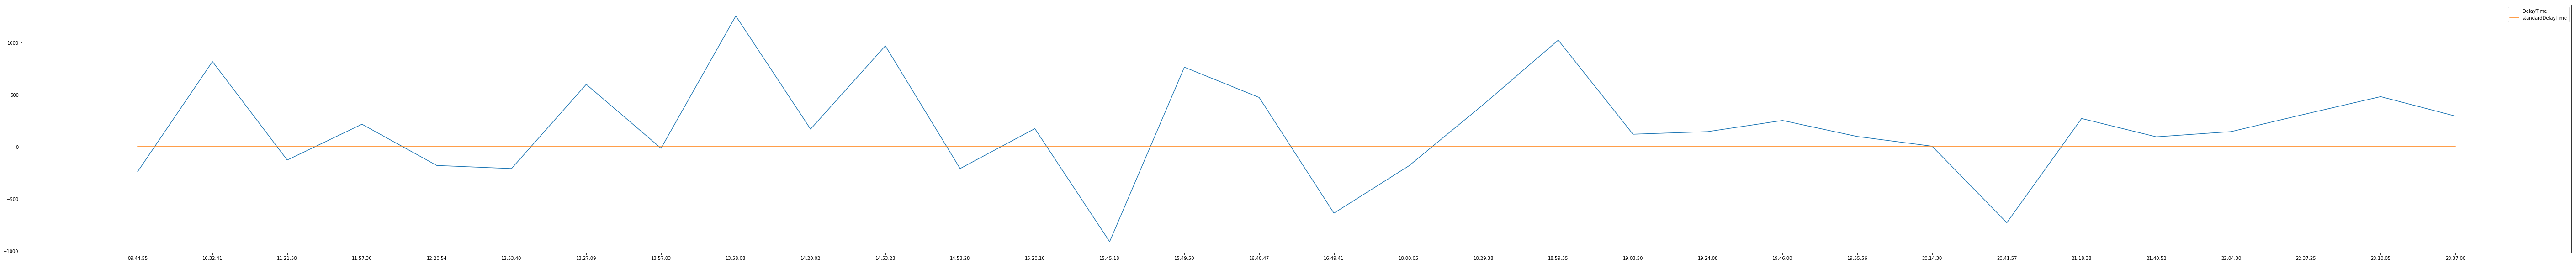

In [568]:
#plot_df[['DelayTime', 'standardDelayTime']].plot(xticks = plot_df['dayInterval'], figsize=(30,10))
ax = plot_df[['DelayTime', 'standardDelayTime']].plot(xticks=plot_df.index, figsize=(100,10))
ax.set_xticklabels(plot_df.dayInterval)

<Figure size 432x288 with 0 Axes>

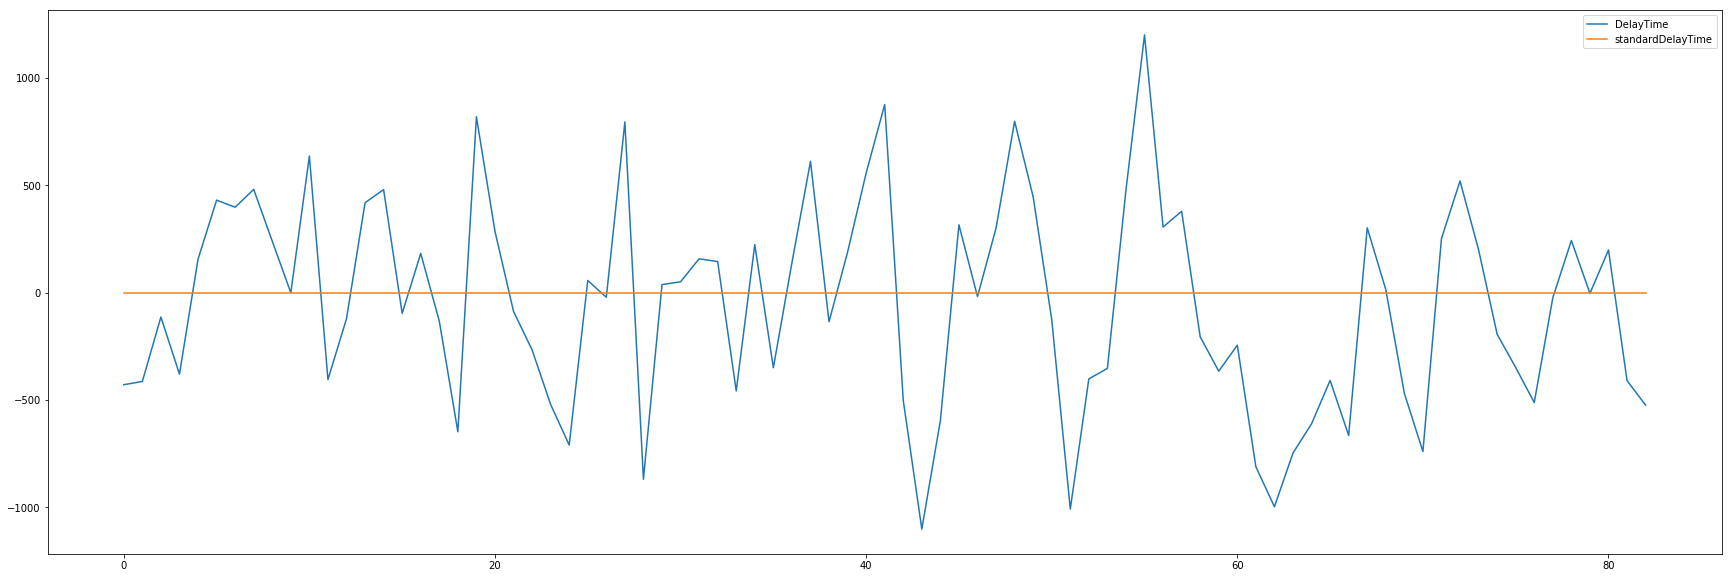

In [65]:
plt.figure()
plot_df.plot(figsize=(30, 10))
#plt.plot(plot_df['DelayTime'],figsize=(100, 10))
#plt.show()

In [52]:
'''
fig1 = plt.figure(figsize=(15,5))
plt.xticks(pd.date_range('2017-02-06','2017-02-28'))
#plt.xticks(plot_df.index,rotation=90)#设置时间标签显示格式
plt.plot(plot_df)
plt.show()
'''

"\nfig1 = plt.figure(figsize=(15,5))\nplt.xticks(pd.date_range('2017-02-06','2017-02-28'))\n#plt.xticks(plot_df.index,rotation=90)#设置时间标签显示格式\nplt.plot(plot_df)\nplt.show()\n"

In [116]:
plot_df.index

Index(['2017-02-06 10:00:00', '2017-02-06 10:00:00', '2017-02-06 10:00:00',
       '2017-02-06 10:00:00', '2017-02-06 10:00:00', '2017-02-06 11:00:00',
       '2017-02-06 11:00:00', '2017-02-06 11:00:00', '2017-02-06 11:00:00',
       '2017-02-06 11:00:00',
       ...
       '2017-02-28 8:00:00', '2017-02-28 8:00:00', '2017-02-28 8:00:00',
       '2017-02-28 9:00:00', '2017-02-28 9:00:00', '2017-02-28 9:00:00',
       '2017-02-28 9:00:00', '2017-02-28 9:00:00', '2017-02-28 9:00:00',
       '2017-02-28 9:00:00'],
      dtype='object', name='DateTimeOfService', length=1242)